In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor,ElasticNet,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Normalizer
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
%matplotlib inline

In [153]:
df = pd.read_csv('data/data.csv')

# Data Cleaning and Formatting

In [154]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [155]:
def eda(df): 
    eda_df = {}
    eda_df['null_sum'] = df.isnull().sum()
    eda_df['null_pct'] = df.isnull().mean()
    eda_df['dtypes'] = df.dtypes
    eda_df['count'] = df.count()
    eda_df['mean'] = df.mean()
    eda_df['median'] = df.median()
    eda_df['min'] = df.min()
    eda_df['max'] = df.max()
    return pd.DataFrame(eda_df)

print(len(df))
eda(df)

21613


,null_sum,null_pct,dtypes,count,mean,median,min,max
bathrooms,0,0.0,float64,21613,2.114757e+00,2.250000e+00,0,8
bedrooms,0,0.0,int64,21613,3.370842e+00,3.000000e+00,0,33
condition,0,0.0,int64,21613,3.409430e+00,3.000000e+00,1,5
date,0,0.0,object,21613,NaN,NaN,20140502T000000,20150527T000000
floors,0,0.0,float64,21613,1.494309e+00,1.500000e+00,1,3.5
grade,0,0.0,int64,21613,7.656873e+00,7.000000e+00,1,13
id,0,0.0,int64,21613,4.580302e+09,3.904930e+09,1000102,9900000190
lat,0,0.0,float64,21613,4.756005e+01,4.757180e+01,47.1559,47.7776
long,0,0.0,float64,21613,-1.222139e+02,-1.222300e+02,-122.519,-121.315
price,0,0.0,float64,21613,5.400881e+05,4.500000e+05,75000,7.7e+06


In [156]:
df.dtypes.value_counts()

int64      15
float64     5
object      1
dtype: int64

In [157]:
# get only year from date
df['date']  = pd.to_datetime(df.date).dt.year

In [158]:
df.date.describe()

count    21613.000000
mean      2014.322954
std          0.467616
min       2014.000000
25%       2014.000000
50%       2014.000000
75%       2015.000000
max       2015.000000
Name: date, dtype: float64

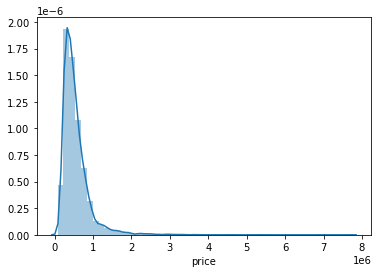

In [159]:
# check label distribution
sns.distplot(df.price)

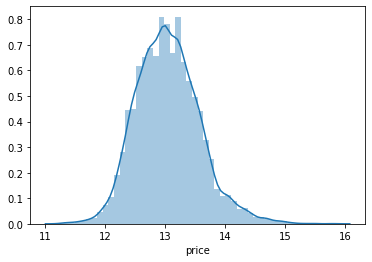

In [160]:
# check label log distribution
sns.distplot(np.log(df.price))

In [161]:
df.price = np.log(df.price)

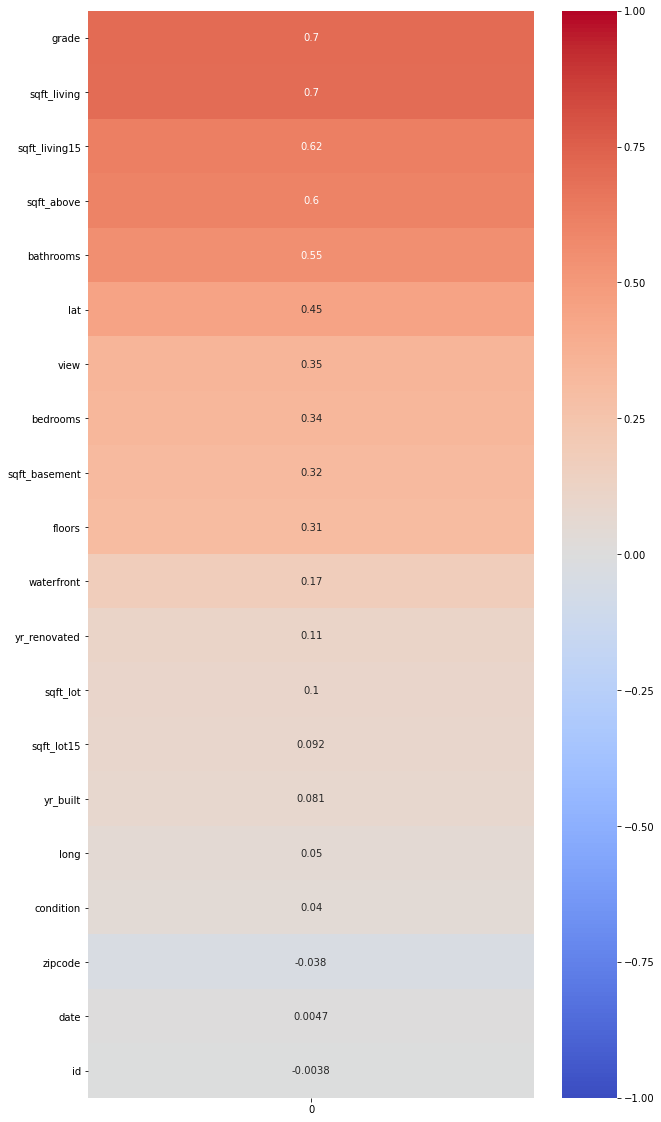

In [162]:
price = df.price
df = df.drop(columns=['price']) # drop and add to keep price as last column
df['price'] = price
correlations = df.corrwith(df['price']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

In [163]:
# drop features that might confuse our model
df = df.drop(columns=['date','id','zipcode'])

# Model Training

In [164]:
# create train and test data
features = df.drop(columns=['price'])
label= df.price
X_train,X_test,y_train,y_test = train_test_split(features,label,random_state=0)

## SGDRegressor

In [165]:
# train model
model = SGDRegressor()
model.fit(X_train,y_train)

SGDRegressor()

In [166]:
# evaluate model prediction
y_pred = model.predict(X_test)
msquared  = mean_squared_error(y_test,y_pred)
mabs  = mean_absolute_error(y_test,y_pred)
r2  = r2_score(y_test,y_pred)
print('MSE:{}'.format(np.sqrt(msquared)) )
print('MAE:{}'.format(mabs) )
print('R2:{}'.format(r2) )

MSE:6.887681856116943e+17
MAE:2.1501281571178867e+17
R2:-1.7305157931194927e+36


## Elastic Net Lasso

In [167]:
# train model
elastic = ElasticNet()
elastic.fit(X_train,y_train)

ElasticNet()

In [168]:
# evaluate model prediction
y_pred = elastic.predict(X_test)
msquared  = mean_squared_error(y_test,y_pred)
mabs  = mean_absolute_error(y_test,y_pred)
r2  = r2_score(y_test,y_pred)
print('MSE:{}'.format(np.sqrt(msquared)) )
print('MAE:{}'.format(mabs) )
print('R2:{}'.format(r2) )

MSE:0.35692562264031075
MAE:0.2900832979159058
R2:0.5352869576785257


## Ridge

In [169]:
# train model
ridge = Ridge()
ridge.fit(X_train,y_train)

Ridge()

In [170]:
# evaluate model prediction
y_pred = ridge.predict(X_test)
msquared  = mean_squared_error(y_test,y_pred)
mabs  = mean_absolute_error(y_test,y_pred)
r2  = r2_score(y_test,y_pred)
print('MSE:{}'.format(np.sqrt(msquared)) )
print('MAE:{}'.format(mabs) )
print('R2:{}'.format(r2) )

MSE:0.25079875573535804
MAE:0.19426225749870651
R2:0.7705541723193132


## Random Forest Regressor (Best Model)

In [176]:
# train model
rf = RandomForestRegressor()
history = rf.fit(X_train,y_train)

In [177]:
# evaluate model prediction
y_pred = rf.predict(X_test)
msquared  = mean_squared_error(y_test,y_pred)
mabs  = mean_absolute_error(y_test,y_pred)
r2  = r2_score(y_test,y_pred)
print('MSE:{}'.format(np.sqrt(msquared)) )
print('MAE:{}'.format(mabs) )
print('R2:{}'.format(r2) )

MSE:0.17650239472233248
MAE:0.12411003265654333
R2:0.8863601599156434
